In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

In [3]:
data=pd.read_csv('/content/House_Pricing.csv')

In [7]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [8]:
data.shape

(21613, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [10]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
data.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [12]:
data.drop(columns=['No of Times Visited'],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Sale Price', ylabel='Count'>

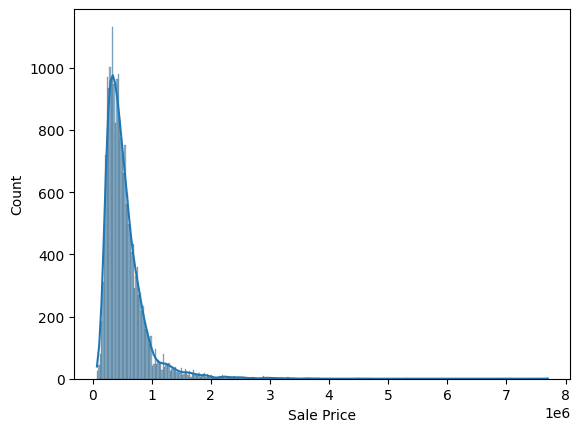

In [13]:
sns.histplot(data['Sale Price'],kde=True)

In [14]:
data['Sale Price'].fillna(data['Sale Price'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='No of Bathrooms', ylabel='Count'>

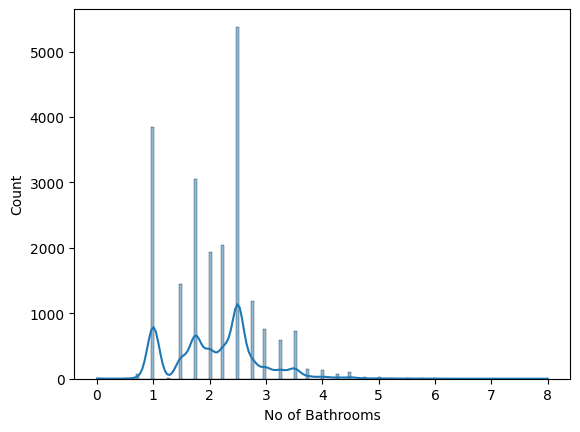

In [15]:
sns.histplot(data['No of Bathrooms'],kde=True)

In [16]:
data['No of Bathrooms'].fillna(data['No of Bathrooms'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Flat Area (in Sqft)', ylabel='Count'>

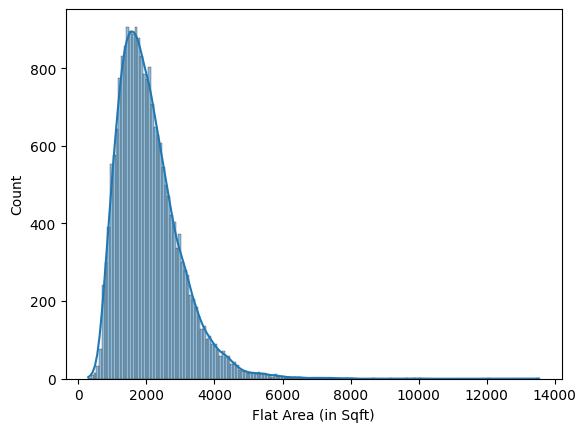

In [17]:
sns.histplot(data['Flat Area (in Sqft)'],kde=True)

In [18]:
data['Flat Area (in Sqft)'].fillna(data['Flat Area (in Sqft)'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Lot Area (in Sqft)', ylabel='Count'>

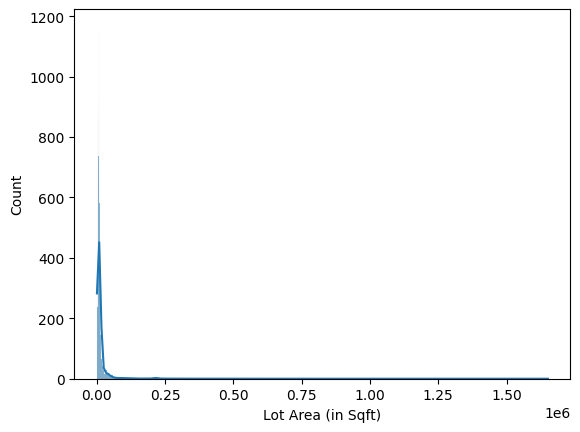

In [19]:
sns.histplot(data['Lot Area (in Sqft)'],kde=True)

In [20]:
data['Lot Area (in Sqft)'].fillna(data['Lot Area (in Sqft)'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Area of the House from Basement (in Sqft)', ylabel='Count'>

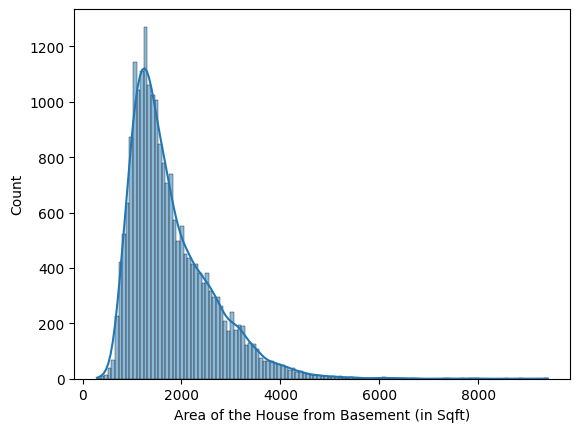

In [21]:
sns.histplot(data['Area of the House from Basement (in Sqft)'],kde=True)

In [22]:
data['Area of the House from Basement (in Sqft)'].fillna(data['Area of the House from Basement (in Sqft)'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Zipcode', ylabel='Count'>

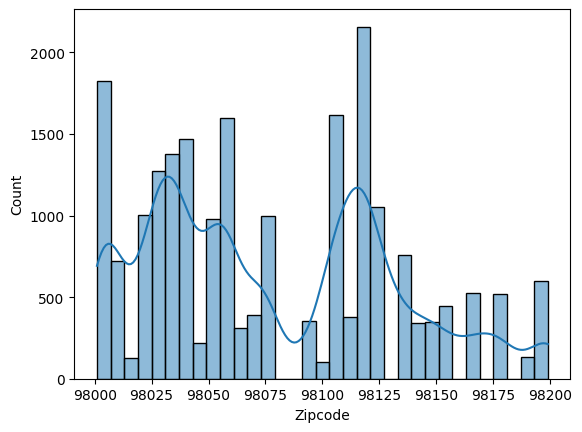

In [23]:
sns.histplot(data['Zipcode'],kde=True)

In [24]:
data['Zipcode'].fillna(data['Zipcode'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Latitude', ylabel='Count'>

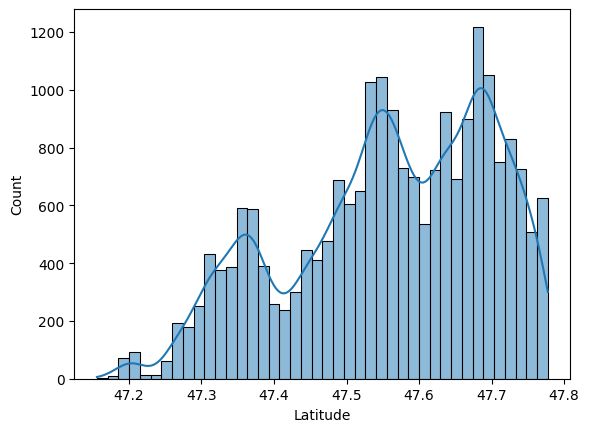

In [25]:
sns.histplot(data['Latitude'],kde=True)

In [26]:
data['Latitude'].fillna(data['Latitude'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Longitude', ylabel='Count'>

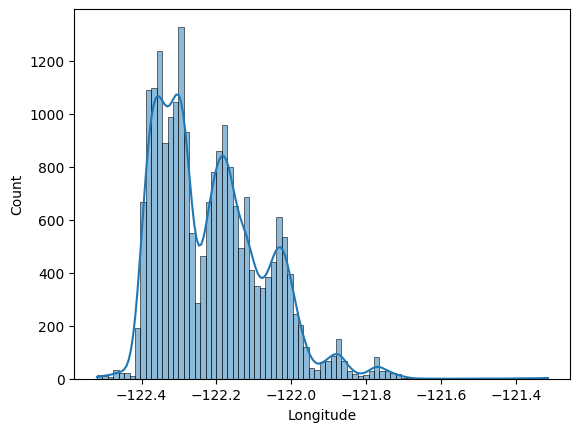

In [27]:
sns.histplot(data['Longitude'],kde=True)

In [28]:
data['Longitude'].fillna(data['Longitude'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Living Area after Renovation (in Sqft)', ylabel='Count'>

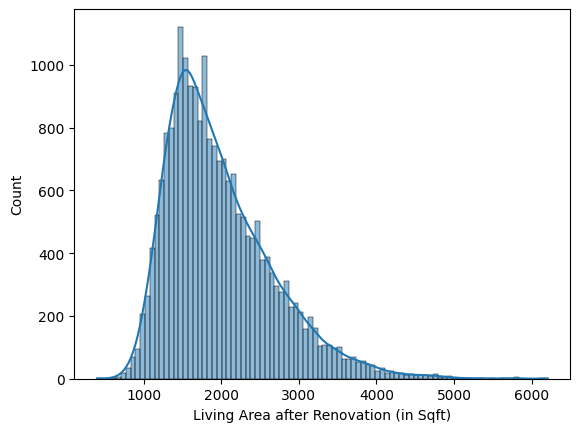

In [29]:
sns.histplot(data['Living Area after Renovation (in Sqft)'],kde=True)

In [30]:
data['Living Area after Renovation (in Sqft)'].fillna(data['Living Area after Renovation (in Sqft)'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [31]:
data.nunique()

ID                                           21436
Date House was Sold                             13
Sale Price                                    3625
No of Bedrooms                                  13
No of Bathrooms                                 30
Flat Area (in Sqft)                           1036
Lot Area (in Sqft)                            9778
No of Floors                                     6
Waterfront View                                  2
Condition of the House                           5
Overall Grade                                   10
Area of the House from Basement (in Sqft)      946
Basement Area (in Sqft)                        306
Age of House (in Years)                        116
Renovated Year                                  70
Zipcode                                         70
Latitude                                      5034
Longitude                                      752
Living Area after Renovation (in Sqft)         777
Lot Area after Renovation (in S

{'whiskers': [<matplotlib.lines.Line2D at 0x7b836269dc90>,
 'caps': [<matplotlib.lines.Line2D at 0x7b836269e110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b836269d9f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b836269e650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b836269e8f0>],
 'means': []}

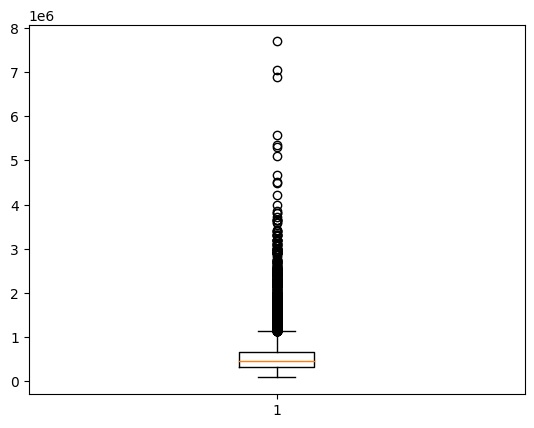

In [32]:
plt.boxplot(data['Sale Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b83625168f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b8362516e30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b8362516590>],
 'medians': [<matplotlib.lines.Line2D at 0x7b8362517370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b8362517610>],
 'means': []}

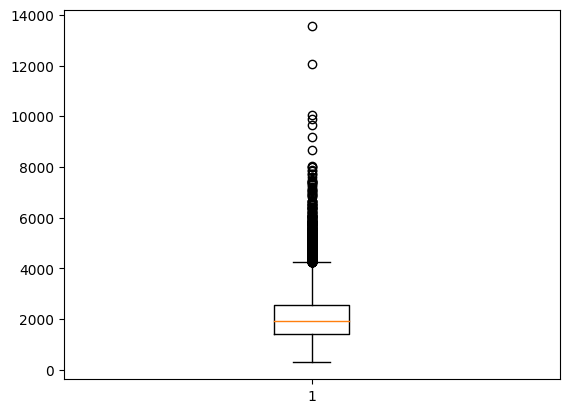

In [33]:
plt.boxplot(data['Flat Area (in Sqft)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b836258a770>,
 'caps': [<matplotlib.lines.Line2D at 0x7b836258acb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b836258a4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b836258b1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b836258b490>],
 'means': []}

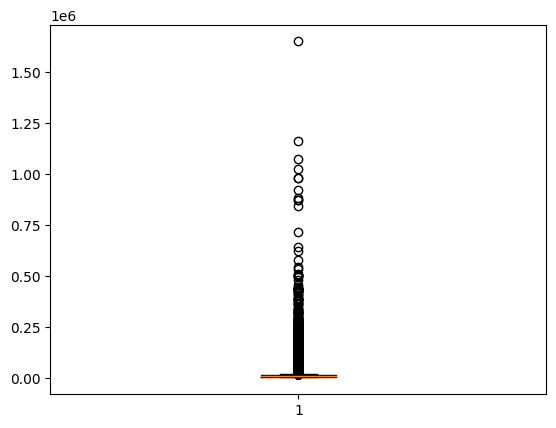

In [34]:
plt.boxplot(data['Lot Area (in Sqft)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b8362409e40>,
 'caps': [<matplotlib.lines.Line2D at 0x7b836240a380>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b8362409ba0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b836240a8c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b8362562890>],
 'means': []}

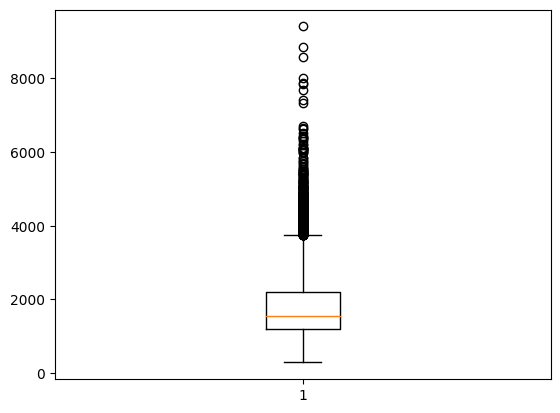

In [35]:
plt.boxplot(data['Area of the House from Basement (in Sqft)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7817a59cf8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7817a584d360>,
 'boxes': [<matplotlib.lines.Line2D at 0x7817a5877e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7817a5a1c490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7817a5a1d5d0>],
 'means': []}

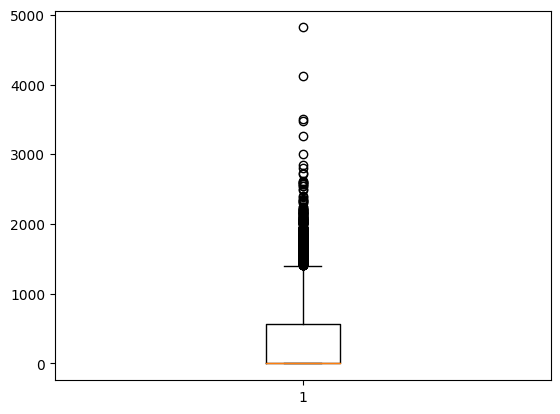

In [ ]:
plt.boxplot(data['Basement Area (in Sqft)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7817a5468850>,
 'caps': [<matplotlib.lines.Line2D at 0x7817a5468d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7817a54685b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7817a54692d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7817a5469570>],
 'means': []}

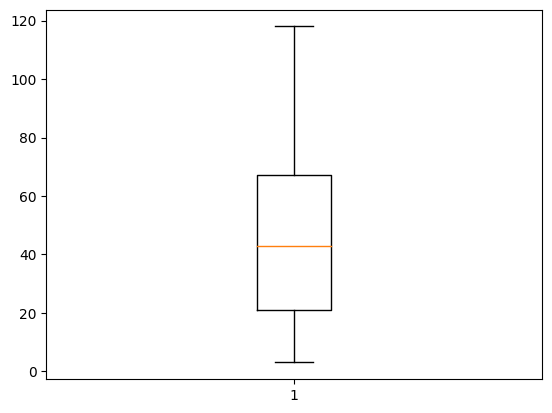

In [ ]:
plt.boxplot(data['Age of House (in Years)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7817a52e4040>,
 'caps': [<matplotlib.lines.Line2D at 0x7817a52e4580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7817a52bfd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7817a52e4ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7817a52e4d60>],
 'means': []}

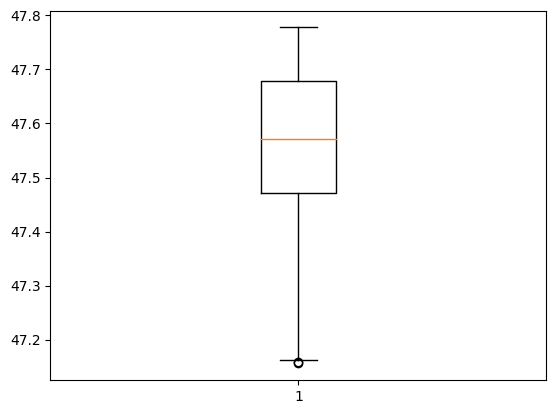

In [ ]:
plt.boxplot(data['Latitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7817a532f220>,
 'caps': [<matplotlib.lines.Line2D at 0x7817a532f760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7817a532ef80>],
 'medians': [<matplotlib.lines.Line2D at 0x7817a532fca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7817a532ff40>],
 'means': []}

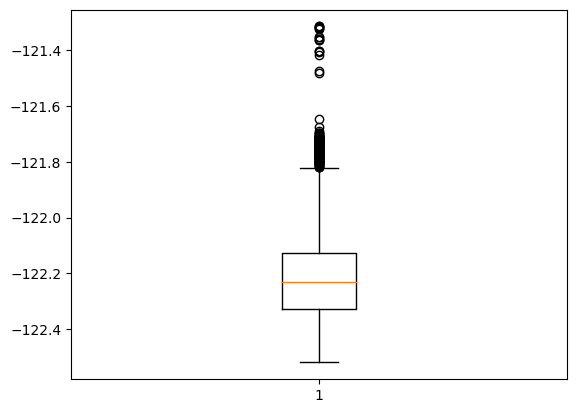

In [ ]:
plt.boxplot(data['Longitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b836245bdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b8362490340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b836245bb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7b8362490880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b8362490b20>],
 'means': []}

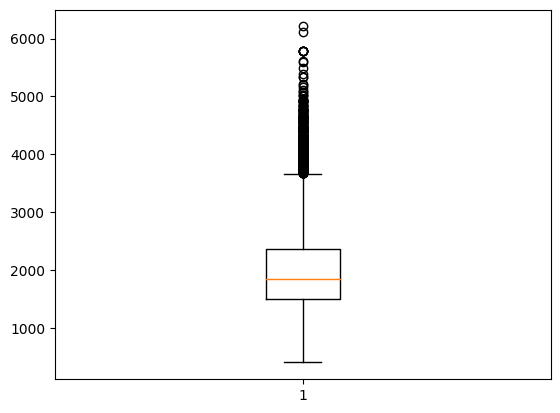

In [36]:
plt.boxplot(data['Living Area after Renovation (in Sqft)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7817a523c760>,
 'caps': [<matplotlib.lines.Line2D at 0x7817a523cca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7817a523c580>],
 'medians': [<matplotlib.lines.Line2D at 0x7817a523d1e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7817a523d480>],
 'means': []}

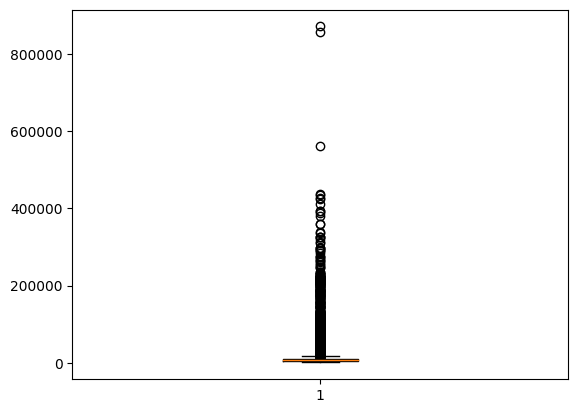

In [ ]:
plt.boxplot(data['Lot Area after Renovation (in Sqft)'])

In [37]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [38]:
categorical_cols=['Date House was Sold','Waterfront View','Condition of the House']
numerical_cols=['Sale Price','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Zipcode','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']

In [39]:
data_encoded=pd.get_dummies(data,columns=categorical_cols,dtype=int,drop_first=True)
data_encoded.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,...,0,1,0,0,0,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,...,0,0,0,0,0,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,...,0,1,0,0,0,0,0,1,0,0


In [40]:
data_encoded.shape

(21613, 34)

In [41]:
data_std_scaled=data_encoded.copy()
std_scaler=StandardScaler()
data_std_scaled[numerical_cols]=std_scaler.fit_transform(data_std_scaled[numerical_cols])
data_std_scaled.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,-0.866363,3,1.00,-0.979523,-0.228241,1.0,7,-0.734699,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,-0.005889,3,2.25,0.533957,-0.189804,2.0,7,0.461060,400,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,-0.980421,2,1.00,-1.425946,-0.123217,1.0,6,-1.229912,0,...,0,1,0,0,0,0,0,1,0,0
3,2487200875,0.173774,4,3.00,-0.130232,-0.243934,1.0,7,-0.891718,910,...,0,0,0,0,0,0,1,0,0,0
4,1954400510,-0.082109,3,2.00,-0.435106,-0.169572,1.0,8,-0.130780,0,...,0,1,0,0,0,0,0,1,0,0


In [42]:
data_minmax_scaled=data_encoded.copy()
minmax_scaler=MinMaxScaler()
data_minmax_scaled[numerical_cols]=minmax_scaler.fit_transform(data_minmax_scaled[numerical_cols])
data_minmax_scaled.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,7129300520,0.019266,3,1.00,0.067170,0.003108,1.0,7,0.097588,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,0.060721,3,2.25,0.172075,0.004072,2.0,7,0.206140,400,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,0.013770,2,1.00,0.036226,0.005743,1.0,6,0.052632,0,...,0,1,0,0,0,0,0,1,0,0
3,2487200875,0.069377,4,3.00,0.126038,0.002714,1.0,7,0.083333,910,...,0,0,0,0,0,0,1,0,0,0
4,1954400510,0.057049,3,2.00,0.104906,0.004579,1.0,8,0.152412,0,...,0,1,0,0,0,0,0,1,0,0


In [43]:
data_minmax_scaled.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,0.061005,3.370842,2.114804,0.135065,0.008834,1.494309,7.623467,0.164285,291.509045,...,0.103225,0.057836,0.045251,0.086753,0.029889,0.007542,0.078703,0.649193,0.262759,0.007958
std,2.876566e+09,0.048179,0.930062,0.770085,0.069316,0.025090,0.539989,1.105439,0.090783,442.575043,...,0.304259,0.233438,0.207858,0.281480,0.170286,0.086517,0.269280,0.477234,0.440143,0.088855
min,1.000102e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,0.032393,3.000000,1.750000,0.085283,0.002738,1.000000,7.000000,0.098684,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904930e+09,0.049180,3.000000,2.250000,0.122264,0.004298,1.500000,7.000000,0.139254,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.308900e+09,0.074754,4.000000,2.500000,0.170566,0.006157,2.000000,8.000000,0.210526,560.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,9.900000e+09,1.000000,33.000000,8.000000,1.000000,1.000000,3.500000,10.000000,1.000000,4820.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
data_corr=data_std_scaled.corr()

In [45]:
data_corr

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
ID,1.000000,-0.016763,0.001286,0.005082,-0.012403,-0.132125,0.018525,0.013799,-0.010770,-0.005151,...,0.013390,0.001719,-0.000475,0.002174,-0.001482,-0.002721,-0.009513,0.030820,-0.025426,-0.012075
Sale Price,-0.016763,1.000000,0.308340,0.525010,0.701978,0.089566,0.256784,0.580638,0.605287,0.323777,...,0.020106,-0.021801,-0.008415,0.003217,0.008615,0.266334,0.057615,0.007133,-0.030741,-0.051895
No of Bedrooms,0.001286,0.308340,1.000000,0.515847,0.576528,0.031688,0.175429,0.349008,0.477575,0.303093,...,-0.002183,-0.008216,0.003905,-0.001118,-0.014772,-0.006582,0.028119,0.004871,-0.008931,-0.051950
No of Bathrooms,0.005082,0.525010,0.515847,1.000000,0.754453,0.087704,0.500593,0.635535,0.685051,0.283779,...,-0.003876,-0.017697,0.004545,-0.019800,-0.014171,0.063745,-0.034313,0.190420,-0.165995,-0.077424
Flat Area (in Sqft),-0.012403,0.701978,0.576528,0.754453,1.000000,0.172737,0.353793,0.705554,0.876056,0.435119,...,-0.007079,-0.018960,0.001301,-0.019743,-0.010677,0.103846,-0.018208,0.102517,-0.083870,-0.065296
Lot Area (in Sqft),-0.132125,0.089566,0.031688,0.087704,0.172737,1.000000,-0.005213,0.102309,0.183493,0.015259,...,-0.006861,-0.008377,0.014539,0.003719,0.015011,0.021611,-0.014494,-0.011340,0.013032,0.037625
No of Floors,0.018525,0.256784,0.175429,0.500593,0.353793,-0.005213,1.000000,0.461228,0.523821,-0.245705,...,0.000478,-0.012255,-0.006363,-0.017148,-0.009220,0.023698,-0.120545,0.318049,-0.257795,-0.055953
Overall Grade,0.013799,0.580638,0.349008,0.635535,0.705554,0.102309,0.461228,1.000000,0.705031,0.145266,...,-0.000957,-0.021756,-0.005588,-0.016952,-0.018622,0.070333,-0.082620,0.197442,-0.140050,-0.090557
Area of the House from Basement (in Sqft),-0.010770,0.605287,0.477575,0.685051,0.876056,0.183493,0.523821,0.705031,1.000000,-0.051859,...,-0.004305,-0.018429,0.006769,-0.017747,-0.011141,0.072099,-0.088457,0.194504,-0.142429,-0.058923
Basement Area (in Sqft),-0.005151,0.323777,0.303093,0.283779,0.435119,0.015259,-0.245705,0.145266,-0.051859,1.000000,...,-0.006825,-0.004046,-0.010052,-0.007065,-0.001387,0.080588,0.127865,-0.151498,0.092712,-0.025309


In [46]:
data_corr1=data_minmax_scaled.corr()

In [47]:
data_corr1

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
ID,1.000000,-0.016763,0.001286,0.005082,-0.012403,-0.132125,0.018525,0.013799,-0.010770,-0.005151,...,0.013390,0.001719,-0.000475,0.002174,-0.001482,-0.002721,-0.009513,0.030820,-0.025426,-0.012075
Sale Price,-0.016763,1.000000,0.308340,0.525010,0.701978,0.089566,0.256784,0.580638,0.605287,0.323777,...,0.020106,-0.021801,-0.008415,0.003217,0.008615,0.266334,0.057615,0.007133,-0.030741,-0.051895
No of Bedrooms,0.001286,0.308340,1.000000,0.515847,0.576528,0.031688,0.175429,0.349008,0.477575,0.303093,...,-0.002183,-0.008216,0.003905,-0.001118,-0.014772,-0.006582,0.028119,0.004871,-0.008931,-0.051950
No of Bathrooms,0.005082,0.525010,0.515847,1.000000,0.754453,0.087704,0.500593,0.635535,0.685051,0.283779,...,-0.003876,-0.017697,0.004545,-0.019800,-0.014171,0.063745,-0.034313,0.190420,-0.165995,-0.077424
Flat Area (in Sqft),-0.012403,0.701978,0.576528,0.754453,1.000000,0.172737,0.353793,0.705554,0.876056,0.435119,...,-0.007079,-0.018960,0.001301,-0.019743,-0.010677,0.103846,-0.018208,0.102517,-0.083870,-0.065296
Lot Area (in Sqft),-0.132125,0.089566,0.031688,0.087704,0.172737,1.000000,-0.005213,0.102309,0.183493,0.015259,...,-0.006861,-0.008377,0.014539,0.003719,0.015011,0.021611,-0.014494,-0.011340,0.013032,0.037625
No of Floors,0.018525,0.256784,0.175429,0.500593,0.353793,-0.005213,1.000000,0.461228,0.523821,-0.245705,...,0.000478,-0.012255,-0.006363,-0.017148,-0.009220,0.023698,-0.120545,0.318049,-0.257795,-0.055953
Overall Grade,0.013799,0.580638,0.349008,0.635535,0.705554,0.102309,0.461228,1.000000,0.705031,0.145266,...,-0.000957,-0.021756,-0.005588,-0.016952,-0.018622,0.070333,-0.082620,0.197442,-0.140050,-0.090557
Area of the House from Basement (in Sqft),-0.010770,0.605287,0.477575,0.685051,0.876056,0.183493,0.523821,0.705031,1.000000,-0.051859,...,-0.004305,-0.018429,0.006769,-0.017747,-0.011141,0.072099,-0.088457,0.194504,-0.142429,-0.058923
Basement Area (in Sqft),-0.005151,0.323777,0.303093,0.283779,0.435119,0.015259,-0.245705,0.145266,-0.051859,1.000000,...,-0.006825,-0.004046,-0.010052,-0.007065,-0.001387,0.080588,0.127865,-0.151498,0.092712,-0.025309
